# Simulation Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(29)

1. How likely is it that you roll doubles when rolling two dice?

In [2]:
rolls = np.random.choice([1,2,3,4,5,6], size = (100000, 2))
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [5, 6],
       [5, 5],
       [6, 5]])

In [6]:
rolls[:,0] == rolls[:,1]

array([False, False, False, ..., False,  True, False])

In [8]:
(rolls[:,0] == rolls[:,1]).sum()/100000

0.16645

In [3]:
(rolls[:,0] == rolls[:,1]).mean()

0.16645

In [4]:
roll1 = np.random.choice([1,2,3,4,5,6], size = (100000, 1))
roll2 = np.random.choice([1,2,3,4,5,6], size = (100000, 1))

In [5]:
(roll1 == roll2).mean()

0.16492

2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [9]:
# 0 = tails, 1 = heads
flips = np.random.choice([0, 1], size = (100000, 8))
flips

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1]])

In [10]:
flips.sum(axis = 1)

array([4, 4, 3, ..., 7, 6, 5])

In [11]:
flips.sum(axis = 1) == 3

array([False, False,  True, ..., False, False, False])

In [12]:
# prob of getting exactly 3 heads
(flips.sum(axis = 1) == 3).mean()

0.22054

In [13]:
# prob of getting > 3 heads
(flips.sum(axis = 1) > 3).mean()

0.63423

3. There are approxmtely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [14]:
# WD = 0, DS = 1
bb = np.random.choice([0, 1], size = (100000, 2), p = [0.75, 0.25])
bb

array([[0, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 0]])

In [15]:
p = (bb.sum(axis = 1) == 2).mean()

In [16]:
# Probability of seeing both billboards as DS
p

0.06264

Converting from probability to odds:

In [17]:
# Probability of seeing anything else
1-p

0.93736

In [18]:
odds = p/(1-p)
odds

0.06682597934624904

In [22]:
#1:14 odds

In [23]:
# theoretical prob
0.25 * 0.25

0.0625

4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the `np.random.normal`) *You'll need to make a judgement call on how to handle some of your values*

In [24]:
pop = np.random.normal(3, 1.5, size = (10000, 5))
pop

array([[ 4.23294812,  3.63063332,  4.82865897,  1.15467852,  2.75840256],
       [ 2.57591416,  3.23742786,  0.83194643,  3.66947445,  2.12055055],
       [ 0.33405153,  2.65282583,  3.66863425, -0.35892286,  1.97375542],
       ...,
       [ 5.00842548,  2.80278721,  2.17462821,  5.11685379,  3.19895059],
       [ 2.62803497,  5.33656042,  5.11629596, -0.19153071,  1.7291772 ],
       [ 2.71973276,  3.28666128,  4.72922987,  5.20253895,  3.68445778]])

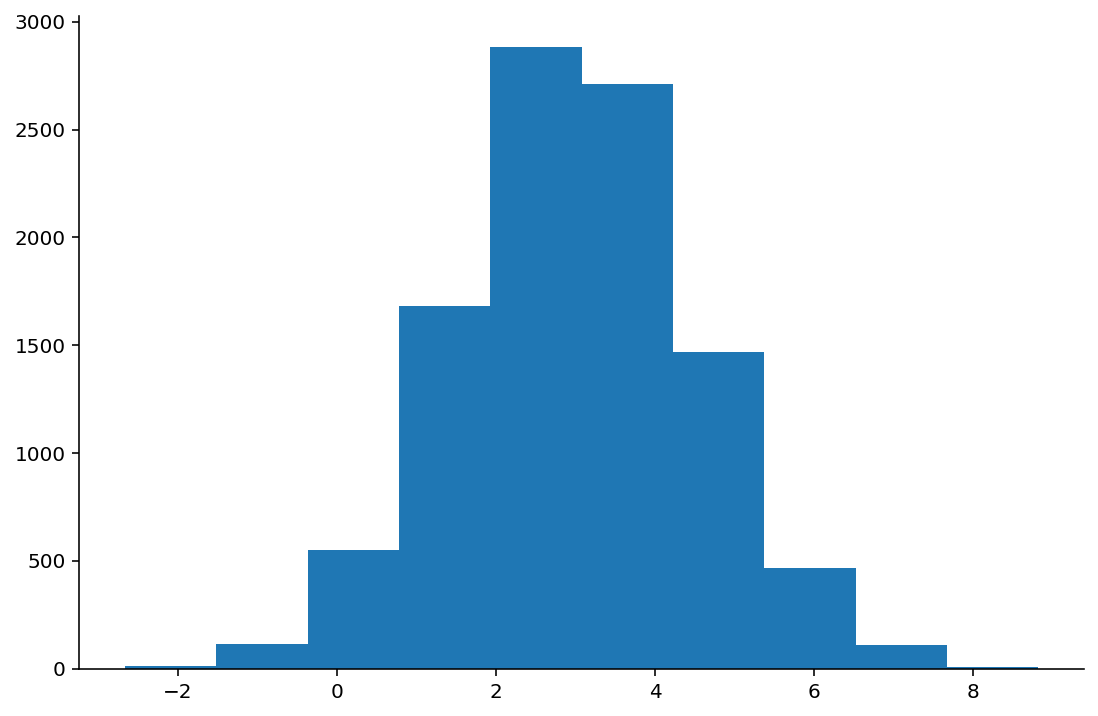

In [25]:
plt.hist(np.random.normal(3, 1.5, size = (10000)));

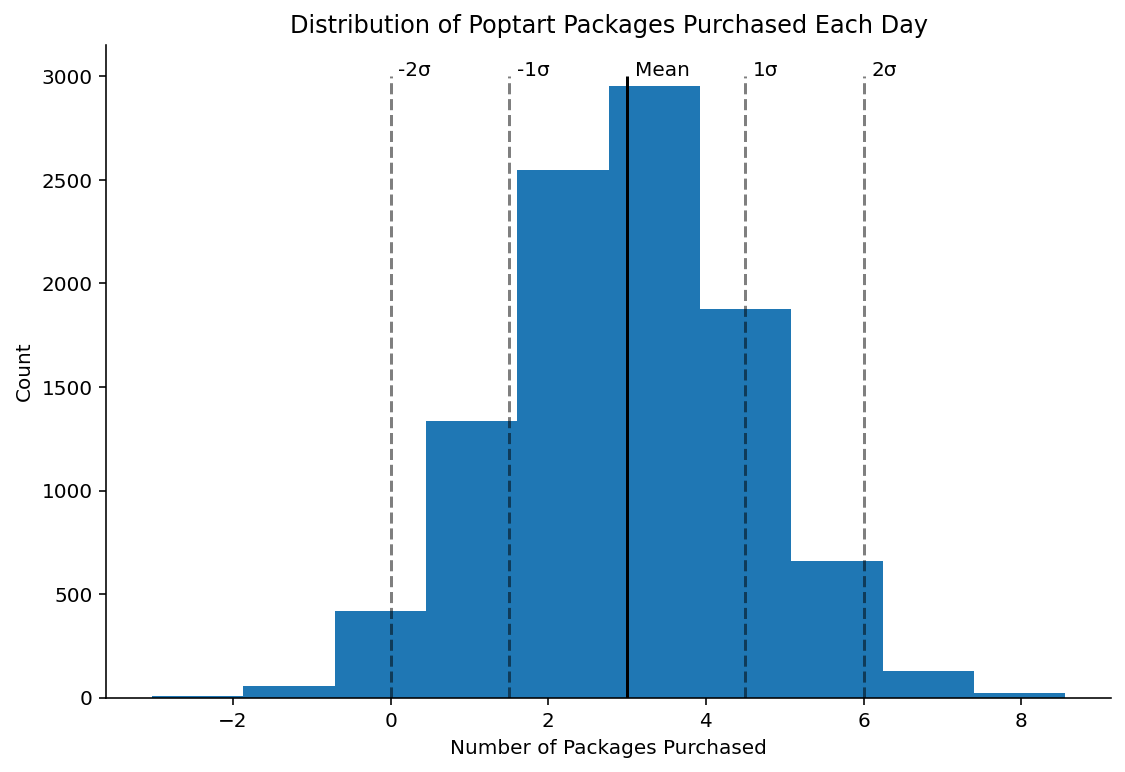

In [26]:
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

If the sum of the week's purchases are less or equal to 16, then there should be at least 1 package remaining for me to purchase.

In [48]:
pop.sum(axis = 1)

array([16.60532149, 12.43531345,  8.27034417, ..., 18.30164528,
       14.61853784, 19.62262064])

In [31]:
pop.sum(axis = 1) <= 16

array([False,  True,  True, ..., False,  True, False])

In [32]:
(pop.sum(axis = 1) <= 16).mean()

0.6095

5. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - Since you have means and standard deviations, you can use `np.random.normal` to generate observations.
    - If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [33]:
men = np.random.normal(178, 8, size = 10000)
women = np.random.normal(170, 6, size = 10000)

In [34]:
women

array([178.58167891, 175.31447364, 171.39676644, ..., 172.70326781,
       164.72404853, 168.5743037 ])

In [35]:
men

array([171.98996977, 168.17665148, 183.22927003, ..., 167.99290139,
       178.29125814, 181.42854124])

In [36]:
(women > men).mean()

0.2193

6. When installing anaconda on a student's computer, there's a 1 in 250 chance
   that the download is corrupted and the installation fails. What are the odds
   that after having 50 students download anaconda, no one has an installation
   issue?  100 students?

    What is the probability that we observe an installation issue within the first
    150 students that download anaconda?

    How likely is it that 450 students all download anaconda without an issue?

In [37]:
# 0 = no issues, 1 = issue
install = np.random.choice([0,1], size = (10000, 50), p = [249/250, 1/250])
install

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
# prob of zero issues for 50 students
(install.sum(axis = 1) == 0).mean()

0.8211

In [42]:
install_100 = np.random.choice([0,1], size = (10000, 100), p = [249/250, 1/250 ] )
install_100

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
# prob for 100 students (0 issues)
(install_100.sum(axis = 1) == 0).mean()

0.6611

In [44]:
install_150 = np.random.choice([0,1], size = (10000, 150), p = [249/250, 1/250 ] )
install_150

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
# 150 students. Prob of install issue
(install_150.sum(axis =1) > 0).mean()

0.4517

In [46]:
install_450 = np.random.choice([0,1], size = (10000, 450), p = [249/250, 1/250 ] )
install_450

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
# prob of no issues when we have 450 students
(install_450.sum(axis =1) ==0).mean()

0.1616

7. There's a 70% chance on any given day that there will be at least one food
   truck at Travis Park. However, you haven't seen a food truck there in 3 days.
   How unlikely is this?

    How likely is it that a food truck will show up sometime this week?

In [49]:
# 0 = np truck, 1 = truck shows up
trucks = np.random.choice([0, 1], size = (10000, 3), p = [0.3, 0.7] )
trucks

array([[1, 1, 0],
       [1, 1, 0],
       [0, 1, 1],
       ...,
       [1, 1, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [50]:
# prob that no truck shows up in 3 days
(trucks.sum(axis = 1) == 0).mean()

0.0275

In [51]:
trucks1 = np.random.choice([0, 1], size = (10000, 5), p = [0.3, 0.7] )
trucks1

array([[1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 1, 1],
       ...,
       [0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1]])

In [52]:
# How likely is it that a food truck will show up sometime this week?
(trucks1.sum(axis = 1) >= 1).mean()

0.9974

8. If 23 people are in the same room, what are the odds that atleast two of them share a birthday? What if it's 20 people? 40?

Be sure to add, commit, and push your work.

In [53]:
# We simulate 10000 rooms, each with 23 people in them
bd = np.random.choice(range(1,366), size = (10000, 23))
bd

array([[204, 228, 324, ..., 340, 124, 219],
       [124, 351, 172, ..., 150, 173, 336],
       [177, 183, 221, ...,  87,   5, 240],
       ...,
       [132,  12, 249, ...,  72,   3,  72],
       [ 80, 260,  26, ..., 161,  46, 340],
       [110,  83, 301, ..., 251, 184, 144]])

Anytime there is less than 23 unique numbers, we know that there must be a shared birthday

In [54]:
pd.DataFrame(bd).nunique(axis = 1)

0       22
1       22
2       23
3       22
4       23
        ..
9995    23
9996    23
9997    21
9998    21
9999    22
Length: 10000, dtype: int64

In [55]:
# Percentage of rooms with a shared birthday
(pd.DataFrame(bd).nunique(axis = 1) < 23).mean()

0.4979

In [56]:
# What about 20 people in the room?
# What is probability that two people share a birthday

n_simulations = 100_000
n_people = 20

# Produce some random birthdays
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()

0.41268

In [57]:
# What about 40 people in the room?
# What is probability that two people share a birthday

n_simulations = 100_000
n_people = 40

# Produce some random birthdays
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()

0.89047